В вашем распоряжении данные о поведении пользователей сотовой компании. Руководство хочет понять, какой тариф приносит больший доход компании.

Описание данных:

   * history.csv - посуточные данные о действиях пользователь
        * date - дата
        * user_id - id пользователя
        * tariff - Название тарифа
        * gb - количество израсходованных Гб за сутки
        * min - количество израсходованных минут за сутки
        * sms - количество израсходованных смс за сутки
        * count_calls - количество звонков за сутки
   * tariffs.csv - Информация о тарифных планах
        * tariff - название тарифа
        * min - количество минут в пакете
        * gb - количество Гб в пакете
        * sms - количество смс в пакете
        * price - стоимость пакета
        * price_1min - стоимость 1 минуты при привышении количества минут пакета
        * price_1gb	- стоимость 1 Гб при привышении количества Гб пакета 
        * price_1sms - стоимость 1 смс при привышении количества смс пакета 

1. Подготовьте данные
    * Приведите данные к нужным типам;
    * Найдите и исправьте ошибки в данных, если они есть.
2. Посчитайте для каждого пользователя:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
3. Проанализируйте данные
    * Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
4. Проверьте гипотезы:
    * средняя выручка пользователей тарифов «VIP», «Стандартный» различаются
    * средняя выручка пользователей тарифа «Премиум» больше чем средняя выручка пользователей тарифа «VIP»
        - Пороговое значение alpha задайте самостоятельно
5. Поясните:
    * как вы формулировали нулевую и альтернативную гипотезы;
    * какой критерий использовали для проверки гипотез и почему.
6. Сделайте финальные выводы

# Жданов Н.А. РИМ-110971

# Подготовка данных

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import pandas as pd

In [3]:
history = pd.read_csv('history.csv', sep=',', encoding='cp1251', encoding_errors='ignore')
tariffs = pd.read_csv('tariffs.csv', sep=',',encoding='cp1251', encoding_errors='ignore')

In [4]:
history.head()

,Unnamed: 0,date,user_id,tariff,gb,min,sms,count_calls
0,0,23/02/2018,100602,Стандартный,2.18,1.0,2.0,1
1,1,23/03/2018,102494,Стандартный,4.23,4.0,2.0,1
2,2,30/07/2018,101593,Стандартный,4.91,7.0,2.0,2
3,3,27/02/2018,102541,Стандартный,1.60,9.0,2.0,2
4,4,01/08/2018,101477,Стандартный,1.63,8.0,2.0,2


In [5]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848000 entries, 0 to 847999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   848000 non-null  int64  
 1   date         848000 non-null  object 
 2   user_id      848000 non-null  int64  
 3   tariff       848000 non-null  object 
 4   gb           848000 non-null  float64
 5   min          848000 non-null  float64
 6   sms          848000 non-null  float64
 7   count_calls  848000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 51.8+ MB


In [6]:
duplicateRowsDF = history[history.duplicated()]
duplicateRowsDF

,Unnamed: 0,date,user_id,tariff,gb,min,sms,count_calls


In [7]:
(history[['gb','min','sms','count_calls']] < 0).any()

gb             False
min            False
sms            False
count_calls    False
dtype: bool

In [8]:
tariffs.head()

,Unnamed: 0,tariff,min,gb,sms,price,price_1min,price_1gb,price_1sms
0,0,Стандартный,250,5,50,300,2.0,100,5
1,1,VIP,1500,50,200,900,1.6,100,5
2,2,Премиум,3000,70,500,2000,1.5,100,5


In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3 non-null      int64  
 1   tariff      3 non-null      object 
 2   min         3 non-null      int64  
 3   gb          3 non-null      int64  
 4   sms         3 non-null      int64  
 5   price       3 non-null      int64  
 6   price_1min  3 non-null      float64
 7   price_1gb   3 non-null      int64  
 8   price_1sms  3 non-null      int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 344.0+ bytes


In [10]:
history['sms']=history['sms'].astype('int')

In [11]:
history["date"] = pd.to_datetime(history["date"])

Все данные приведены к нужным типам. В датасете нет nan, повторяющихся строк и отрицательных значений.

# Для каждого пользователя

In [12]:
history = history.sort_values(by='date', ascending=True)

In [13]:
history.head()

,Unnamed: 0,date,user_id,tariff,gb,min,sms,count_calls
42736,42736,2018-01-02,101969,Стандартный,3.47,10.0,2,2
446560,446560,2018-01-02,100381,Стандартный,2.19,10.0,2,2
446732,446732,2018-01-02,100694,VIP,3.21,37.0,2,4
446739,446739,2018-01-02,102077,Стандартный,2.03,11.0,2,2
719706,719706,2018-01-02,102717,Премиум,0.81,3.0,14,1


In [14]:
user_uni=history['user_id'].unique()

In [15]:
user_uni.size

4000

In [16]:
user_uni

array([101969, 100381, 100694, ..., 102430, 101974, 100519], dtype=int64)

Создан список из 4000 уникальных пользователей

In [17]:
history["month"] = history["date"].dt.month

In [18]:
month_calls=[]
month_mins=[]
month=[]
user_id=[]
for user in user_uni:
    for j in range(1,13):
        m_calls=history['count_calls'].loc[(history['month']==j)&(history['user_id']==user)].sum()
        m_mins=history['min'].loc[(history['month']==j)&(history['user_id']==user)].sum()
        month.append(j)
        user_id.append(user)
        month_calls.append(m_calls)
        month_mins.append(m_mins)

In [19]:
monthly = pd.DataFrame(list(zip(user_id, month, month_calls, month_mins)),
               columns =['user_id', 'month', 'month_calls', 'month_mins'])

In [20]:
monthly

,user_id,month,month_calls,month_mins
0,101969,1,15,69.0
1,101969,2,50,237.0
2,101969,3,54,251.0
3,101969,4,49,230.0
4,101969,5,50,215.0
...,...,...,...,...
47995,100519,8,50,227.0
47996,100519,9,11,44.0
47997,100519,10,10,51.0
47998,100519,11,15,65.0


Для каждого пользователя выведены звонки и минуты за 12 месяцев

In [21]:
month_gb=[]
month_sms=[]
for user in user_uni:
    for j in range(1,13):
        m_gb=history['gb'].loc[(history['month']==j)&(history['user_id']==user)].sum()
        m_sms=history['sms'].loc[(history['month']==j)&(history['user_id']==user)].sum()
        month_gb.append(m_gb)
        month_sms.append(m_sms)

In [22]:
monthly = pd.DataFrame(list(zip(user_id, month, month_calls, month_mins, month_sms, month_gb)),
               columns =['user_id', 'month', 'month_calls', 'month_mins', 'month_sms', 'month_gb'])

In [23]:
monthly

,user_id,month,month_calls,month_mins,month_sms,month_gb
0,101969,1,15,69.0,14,21.30
1,101969,2,50,237.0,41,66.25
2,101969,3,54,251.0,49,70.46
3,101969,4,49,230.0,50,85.33
4,101969,5,50,215.0,53,84.90
...,...,...,...,...,...,...
47995,100519,8,50,227.0,52,75.22
47996,100519,9,11,44.0,14,24.39
47997,100519,10,10,51.0,14,18.01
47998,100519,11,15,65.0,14,24.41


Для каждого пользователя выведены смс и гб за 12 месяцев

In [24]:
cut=history[['user_id','tariff']]

In [25]:
cut=cut.drop_duplicates()

In [26]:
count=pd.merge(monthly,cut,how='left',on='user_id')

In [27]:
count

,user_id,month,month_calls,month_mins,month_sms,month_gb,tariff
0,101969,1,15,69.0,14,21.30,Стандартный
1,101969,2,50,237.0,41,66.25,Стандартный
2,101969,3,54,251.0,49,70.46,Стандартный
3,101969,4,49,230.0,50,85.33,Стандартный
4,101969,5,50,215.0,53,84.90,Стандартный
...,...,...,...,...,...,...,...
47995,100519,8,50,227.0,52,75.22,Стандартный
47996,100519,9,11,44.0,14,24.39,Стандартный
47997,100519,10,10,51.0,14,18.01,Стандартный
47998,100519,11,15,65.0,14,24.41,Стандартный


In [28]:
count=pd.merge(count,tariffs,how='left',on='tariff')

In [29]:
count=count.drop(['Unnamed: 0'],axis=1)

In [30]:
count

,user_id,month,month_calls,month_mins,month_sms,month_gb,tariff,min,gb,sms,price,price_1min,price_1gb,price_1sms
0,101969,1,15,69.0,14,21.30,Стандартный,250,5,50,300,2.0,100,5
1,101969,2,50,237.0,41,66.25,Стандартный,250,5,50,300,2.0,100,5
2,101969,3,54,251.0,49,70.46,Стандартный,250,5,50,300,2.0,100,5
3,101969,4,49,230.0,50,85.33,Стандартный,250,5,50,300,2.0,100,5
4,101969,5,50,215.0,53,84.90,Стандартный,250,5,50,300,2.0,100,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,100519,8,50,227.0,52,75.22,Стандартный,250,5,50,300,2.0,100,5
47996,100519,9,11,44.0,14,24.39,Стандартный,250,5,50,300,2.0,100,5
47997,100519,10,10,51.0,14,18.01,Стандартный,250,5,50,300,2.0,100,5
47998,100519,11,15,65.0,14,24.41,Стандартный,250,5,50,300,2.0,100,5


Пользователи с тарифными планами

In [259]:
gain = pd.DataFrame(columns=['gain'], index=range(len(count)))

In [263]:
for i in range(len(count)):
    if ((count.iloc[i]['month_mins']-count.iloc[i]['min'])*count.iloc[i]['price_1min']+(count.iloc[i]['month_sms']-count.iloc[i]['sms'])*count.iloc[i]['price_1sms']+(count.iloc[i]['month_gb']-count.iloc[i]['gb'])*count.iloc[i]['price_1gb'])>0:
      gain.iloc[i]['gain']=(count.iloc[i]['month_mins']-count.iloc[i]['min'])*count.iloc[i]['price_1min']+(count.iloc[i]['month_sms']-count.iloc[i]['sms'])*count.iloc[i]['price_1sms']+(count.iloc[i]['month_gb']-count.iloc[i]['gb'])*count.iloc[i]['price_1gb']+count.iloc[i]['price']
    else:
       gain.iloc[i]['gain']=count.iloc[i]['price']
    if (count.iloc[i]['month_mins']-count.iloc[i]['min'])*count.iloc[i]['price_1min']>0 and gain.iloc[i]['gain']!=(count.iloc[i]['month_mins']-count.iloc[i]['min'])*count.iloc[i]['price_1min']+(count.iloc[i]['month_sms']-count.iloc[i]['sms'])*count.iloc[i]['price_1sms']+(count.iloc[i]['month_gb']-count.iloc[i]['gb'])*count.iloc[i]['price_1gb']+count.iloc[i]['price']:
      gain.iloc[i]['gain']=(count.iloc[i]['month_mins']-count.iloc[i]['min'])*count.iloc[i]['price_1min']+gain.iloc[i]['gain']
    if (count.iloc[i]['month_sms']-count.iloc[i]['sms'])*count.iloc[i]['price_1sms']>0 and gain.iloc[i]['gain']!=(count.iloc[i]['month_mins']-count.iloc[i]['min'])*count.iloc[i]['price_1min']+(count.iloc[i]['month_sms']-count.iloc[i]['sms'])*count.iloc[i]['price_1sms']+(count.iloc[i]['month_gb']-count.iloc[i]['gb'])*count.iloc[i]['price_1gb']+count.iloc[i]['price']:
      gain.iloc[i]['gain']=(count.iloc[i]['month_sms']-count.iloc[i]['sms'])*count.iloc[i]['price_1sms']+gain.iloc[i]['gain']
    if (count.iloc[i]['month_gb']-count.iloc[i]['gb'])*count.iloc[i]['price_1gb']>0 and gain.iloc[i]['gain']!=(count.iloc[i]['month_mins']-count.iloc[i]['min'])*count.iloc[i]['price_1min']+(count.iloc[i]['month_sms']-count.iloc[i]['sms'])*count.iloc[i]['price_1sms']+(count.iloc[i]['month_gb']-count.iloc[i]['gb'])*count.iloc[i]['price_1gb']+count.iloc[i]['price']:
      gain.iloc[i]['gain']=(count.iloc[i]['month_gb']-count.iloc[i]['gb'])*count.iloc[i]['price_1gb']+gain.iloc[i]['gain']

Выручка за месяц с пользователя, если пользователь не истратил всё кол-во смс, минут и трафика, то в выручку записывается только абонентская плата. Если перерасход по любому из параметров он так же суммируется с абонентской платой.

In [264]:
gain

,gain
0,1388.0
1,6354.0
2,6843.0
3,8293.0
4,8235.0
...,...
47995,7286.0
47996,1647.0
47997,1023.0
47998,1691.0


In [265]:
count['gain']=gain['gain']

# Анализ данных

In [275]:
standard=count.loc[(count['tariff']=='Стандартный')&(count['month']==4)]

In [276]:
standard['month_mins'].describe()

count    2358.000000
mean      228.170908
std        23.998180
min       148.000000
25%       211.000000
50%       228.000000
75%       244.000000
max       313.000000
Name: month_mins, dtype: float64

In [277]:
np.var(standard['month_mins'])

575.6684157157968

In [278]:
standard['month_sms'].describe()

count    2358.000000
mean       49.949534
std         2.817832
min        41.000000
25%        48.000000
50%        50.000000
75%        52.000000
max        60.000000
Name: month_sms, dtype: float64

In [279]:
np.var(standard['month_sms'])

7.936808518597661

In [280]:
standard['month_gb'].describe()

count    2358.000000
mean       76.056993
std         7.510454
min        54.580000
25%        70.795000
50%        76.040000
75%        80.985000
max       104.240000
Name: month_gb, dtype: float64

In [281]:
np.var(standard['month_gb'])

56.3829931220914

<AxesSubplot:>

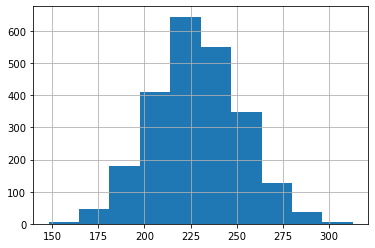

In [282]:
standard['month_mins'].hist()

<AxesSubplot:>

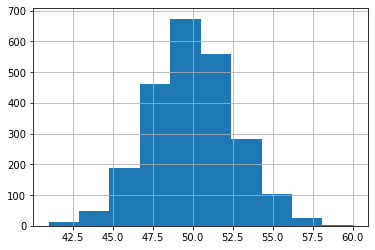

In [283]:
standard['month_sms'].hist()

<AxesSubplot:>

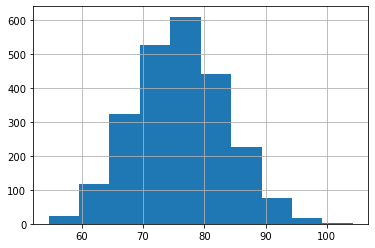

In [284]:
standard['month_gb'].hist()

In [285]:
VIP=count.loc[(count['tariff']=='VIP')&(count['month']==4)]

In [286]:
VIP['month_mins'].describe()

count    1163.000000
mean     1248.221840
std        97.729688
min       970.000000
25%      1181.500000
50%      1247.000000
75%      1315.000000
max      1604.000000
Name: month_mins, dtype: float64

In [287]:
VIP['month_sms'].describe()

count    1163.000000
mean       37.591574
std         2.536989
min        28.000000
25%        36.000000
50%        38.000000
75%        39.000000
max        46.000000
Name: month_sms, dtype: float64

In [288]:
VIP['month_gb'].describe()

count    1163.000000
mean       43.179407
std         5.538814
min        24.650000
25%        39.350000
50%        43.100000
75%        46.850000
max        59.070000
Name: month_gb, dtype: float64

In [289]:
np.var(VIP['month_mins'])

9542.879419829973

In [290]:
np.var(VIP['month_sms'])

6.430780241155902

In [291]:
np.var(VIP['month_gb'])

30.652084170789085

<AxesSubplot:>

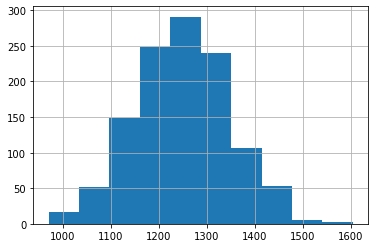

In [292]:
VIP['month_mins'].hist()

<AxesSubplot:>

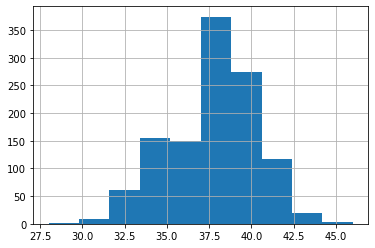

In [293]:
VIP['month_sms'].hist()

<AxesSubplot:>

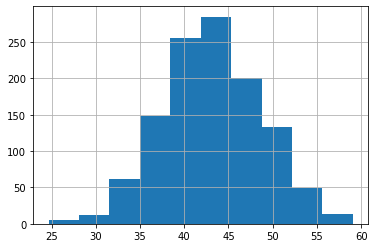

In [294]:
VIP['month_gb'].hist()

In [295]:
Premium=count.loc[(count['tariff']=='Премиум')&(count['month']==4)]

In [296]:
Premium['month_mins'].describe()

count     479.000000
mean     2490.891441
std       239.417976
min      1828.000000
25%      2335.000000
50%      2487.000000
75%      2638.000000
max      3262.000000
Name: month_mins, dtype: float64

In [297]:
Premium['month_sms'].describe()

count    479.000000
mean     416.064718
std       38.584987
min      312.000000
25%      391.000000
50%      416.000000
75%      443.500000
max      528.000000
Name: month_sms, dtype: float64

In [298]:
Premium['month_gb'].describe()

count    479.000000
mean      61.965261
std        7.654181
min       41.800000
25%       56.580000
50%       61.770000
75%       67.270000
max       88.730000
Name: month_gb, dtype: float64

<AxesSubplot:>

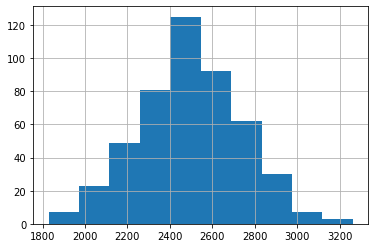

In [299]:
Premium['month_mins'].hist()

<AxesSubplot:>

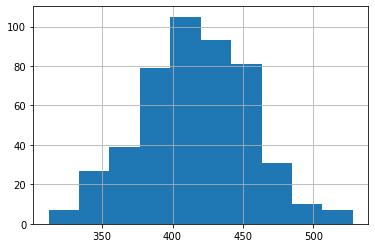

In [300]:
Premium['month_sms'].hist()

<AxesSubplot:>

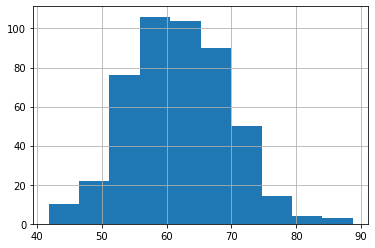

In [301]:
Premium['month_gb'].hist()

Стандартный тариф используют 2358 пользователей. За 4й месяц они использовали от 148 до 313 минут разговора, от 41 до 60 смс, от 54.58 до 104.24 гб траффика. VIP тариф используют 1163 пользователя. За 4й месяц они использовали от 970 до 1604 минут разговора, от 28 до 46 смс, от 24.65 до 59.07 гб траффика. Премиум используют 479 пользователей. За 4й месяц они использовали от 1828 до 3262 минут разговора, от 312 до 528 смс, от 41.8 до 88.73 гб траффика. Все распределения являются нормальными.

# Проверка гипотез

In [302]:
np.var(standard['gain'])

566547.401537077

In [303]:
np.var(VIP['gain'])

12177.097054982038

In [304]:
np.var(Premium['gain'])

21312.5914265541

<AxesSubplot:>

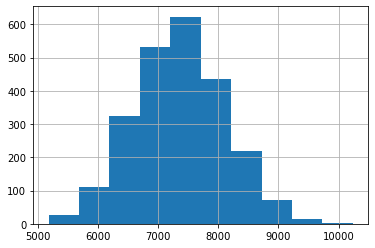

In [305]:
standard['gain'].hist()

<AxesSubplot:>

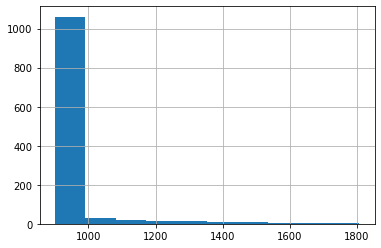

In [306]:
VIP['gain'].hist()

<AxesSubplot:>

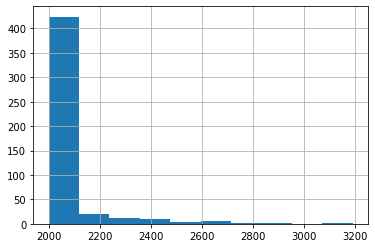

In [307]:
Premium['gain'].hist()

In [313]:
from scipy import stats as st
import numpy as np

alpha = 0.05

results = st.ttest_ind(standard['gain'], VIP['gain'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


In [314]:
from scipy import stats as st
import numpy as np

alpha = 0.05

results = st.ttest_ind(VIP['gain'], Premium['gain'], equal_var = False)

print('p-значение:', results.pvalue/2)

if (results.pvalue/2 < alpha) and (Premium['gain'].mean()>VIP['gain'].mean()):
    print("Отвергаем нулевую гипотезу: скорее всего средняя выручка пользователей тарифа «Премиум» больше чем средняя выручка пользователей тарифа «VIP»")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средняя выручка пользователей тарифа «Премиум» не больше чем средняя выручка пользователей тарифа «VIP»")

p-значение: 0.0
Отвергаем нулевую гипотезу: скорее всего средняя выручка пользователей тарифа «Премиум» больше чем средняя выручка пользователей тарифа «VIP»


Гипотеза средняя выручка пользователей тарифов «VIP», «Стандартный» различаются. Нулевая гпотеза: средние выручки равны, альтернативная гипотеза: средние выручки не равны. Применим метод scipy.stats.ttest_ind чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей. Гипотеза двусторонняя. Дисперсии выборок не равны. 
Гипотеза средняя выручка пользователей тарифа «Премиум» больше чем средняя выручка пользователей тарифа «VIP». Нулевая гпотеза: средние выручки равны, альтернативная гипотеза: средняя выручка пользователей тарифа «Премиум» больше. Применим метод scipy.stats.ttest_ind чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей. Гипотеза односторонняя. Дисперсии выборок не равны. 

# Вывод

В результате работы были обработанны и проанализированны данные о пользователях трех тарифов. В результате проверки статистических гипотез были отвергнуты нулевые гипотезы